In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv('data/steam-200k.csv')

In [63]:
df.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [64]:
df.columns = ['user_id', 'game', 'action', 'value', '0']

### EDA

In [65]:
df.head()

,user_id,game,action,value,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [66]:
df['game'].unique().size

5155

In [67]:
df['user_id'].unique().size

12393

<Axes: title={'center': 'Top 10 owned games'}, xlabel='game', ylabel='count'>

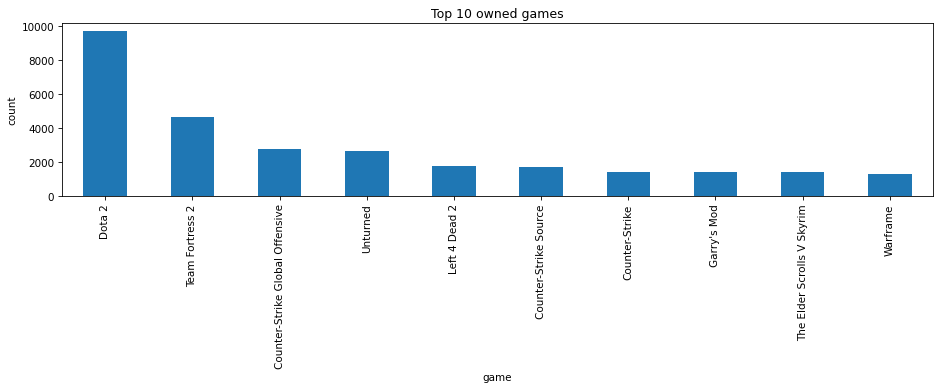

In [68]:
n_owned_games = 10
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.set_title(label=f'Top {n_owned_games} owned games')
ax.set_xlabel(xlabel='game')
ax.set_ylabel(ylabel='count')
fig.set_dpi(val=75)
df['game'].value_counts()[:n_owned_games].plot.bar(ax=ax)

/var/folders/bf/b11n35tn2rq9mr6mw11m8f7w0000gn/T/ipykernel_1236/372093266.py:7: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df[df['action'] == 'play'].groupby(by='game')['value'].aggregate(sum).sort_values(ascending=False)[:n_played_games].plot.bar(ax=ax)


<Axes: title={'center': 'Top 10 played games (hours accumulated)'}, xlabel='game', ylabel='hours played'>

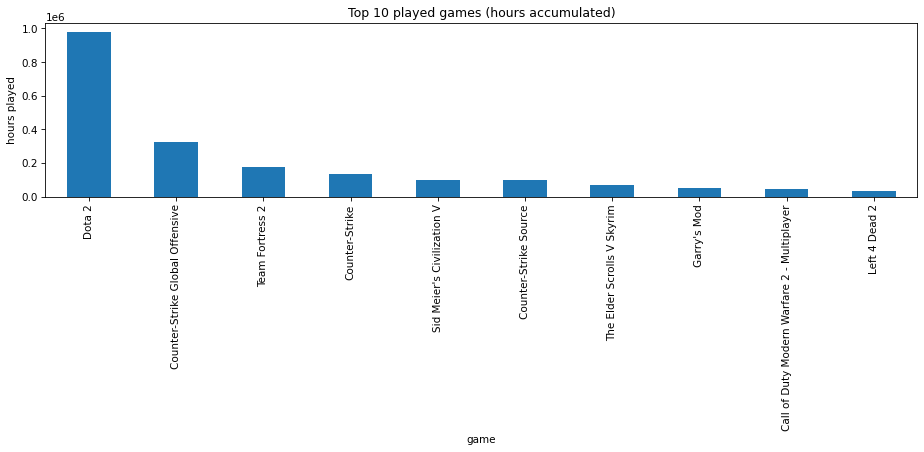

In [69]:
n_played_games = 10
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.set_xlabel(xlabel='game')
ax.set_ylabel(ylabel='hours played')
fig.set_dpi(75)
ax.set_title(label=f'Top {n_played_games} played games (hours accumulated)')
df[df['action'] == 'play'].groupby(by='game')['value'].aggregate(sum).sort_values(ascending=False)[:n_played_games].plot.bar(ax=ax)

<Axes: title={'center': 'Top 10 played games (hours accumulated)'}, xlabel='0', ylabel='hours played'>

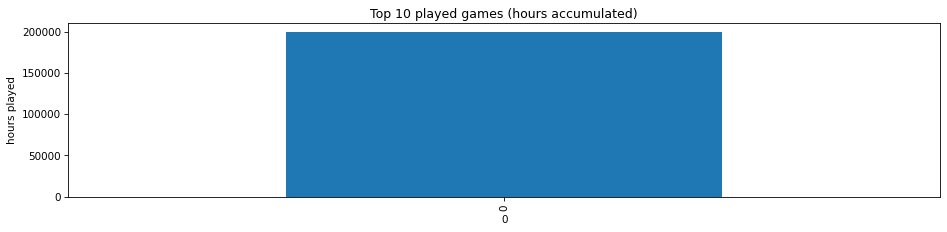

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(15, 3))
ax.set_xlabel(xlabel='0')
ax.set_ylabel(ylabel='hours played')
fig.set_dpi(75)
ax.set_title(label=f'Top {n_played_games} played games (hours accumulated)')
df['0'].value_counts().plot.bar(ax=ax)

### Creating user-item matrix
Each row corresponds to a user and each column corresponds to a game. The value in each cell represents the 'rating' given by a user to a game. The 'rating' is computed based on the hours played by a user.

In [71]:
df = df[df['action'] == 'play']
df.head()

,user_id,game,action,value,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,play,8.9,0


In [72]:
aggregated_data = df.groupby(['user_id', 'game'], as_index=False)['value'].sum()
user_item_matrix = aggregated_data.pivot(index='user_id', columns='game', values='value')
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix.head()

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
print(f'User-Item matrix shape: {user_item_matrix.shape}')

User-Item matrix shape: (11350, 3600)


### Normalization of the data
Before using the data for computing recommendations, it is normalized.

In [74]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
user_item_matrix_standardized = pd.DataFrame(data=standard_scaler.fit_transform(user_item_matrix),
                                             index=user_item_matrix.index,
                                             columns=user_item_matrix.columns)

In [75]:
user_item_matrix_standardized.head()

game,007 Legends,0RBITALIS,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,1000 Amps,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,...,rFactor,rFactor 2,realMyst,realMyst Masterpiece Edition,resident evil 4 / biohazard 4,rymdkapsel,sZone-Online,the static speaks my name,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
5250,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
76767,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
86540,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
144736,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235
181212,-0.009387,-0.01533,-0.014952,-0.010212,-0.009387,-0.015629,-0.009387,-0.021466,-0.01723,-0.014035,...,-0.009387,-0.009387,-0.011535,-0.012822,-0.024712,-0.009387,-0.044,-0.023848,-0.027844,-0.011235


### User similarity computation
Recommendations are aimed to be made using the similarity between users. In this sense, it can be computed based on the 'ratings' using _cosine similarity_.

In [76]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarities = cosine_similarity(X=user_item_matrix)
user_similarities_df = pd.DataFrame(data=user_similarities,
                                    index=user_item_matrix.index,
                                    columns=user_item_matrix.index)


In [79]:
user_similarities_df

user_id,5250,76767,86540,144736,181212,229911,298950,381543,547685,554278,...,309228590,309255941,309262440,309265377,309404240,309434439,309554670,309626088,309824202,309903146
user_id,,,,,,,,,,,,,,,,,,,,,
5250,1.00000,0.002480,0.000000,0.000000,0.000000,9.778883e-06,0.016179,0.000000,0.000000,0.000000,...,0.00127,0.0,0.005081,0.0,0.000835,0.00127,0.0,0.000000,0.00127,0.00127
76767,0.00248,1.000000,0.000128,0.685379,0.669058,3.389927e-01,0.003713,0.685379,0.037465,0.050745,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.024599,0.00000,0.00000
86540,0.00000,0.000128,1.000000,0.000000,0.000000,7.168671e-07,0.104667,0.000000,0.000000,0.002336,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.005215,0.00000,0.00000
144736,0.00000,0.685379,0.000000,1.000000,0.976187,2.165145e-01,0.000414,1.000000,0.044944,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.00000
181212,0.00000,0.669058,0.000000,0.976187,1.000000,2.116718e-01,0.000404,0.976187,0.043874,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309434439,0.00127,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000414,0.000000,0.000000,0.000000,...,1.00000,0.0,0.000000,0.0,0.000000,1.00000,0.0,0.000000,1.00000,1.00000
309554670,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.00000,1.0,0.000000,0.0,0.164316,0.00000,1.0,0.000000,0.00000,0.00000
309626088,0.00000,0.024599,0.005215,0.000000,0.000000,0.000000e+00,0.000993,0.000000,0.000000,0.000000,...,0.00000,0.0,0.000000,0.0,0.000000,0.00000,0.0,1.000000,0.00000,0.00000
